# My First Positive Thoughts About Python Lessons

Starting my Python journey has been both exciting and enlightening. Here are some of my initial thoughts:

1. **Python's Simplicity**: One of the first things I noticed is how clean and readable Python's syntax is. It's very intuitive, especially for beginners, which makes learning to code much less intimidating.
  
2. **Instant Feedback**: Using interactive environments like Jupyter Notebooks allows for immediate feedback on the code, which helps in quickly identifying mistakes and learning from them.

3. **Versatility**: Python's ability to handle a wide range of tasks—from web development to data science—makes it a valuable skill to learn. It’s encouraging to know that the knowledge gained here can be applied to many real-world applications.

4. **Supportive Community**: Python has an incredibly supportive community with a vast amount of resources, tutorials, and libraries available. It's comforting to know that whenever I get stuck, there’s a wealth of knowledge to tap into.

5. **Hands-on Learning**: The exercises and practical examples during the lessons keep me engaged and allow me to see how Python works in real-world scenarios.

Overall, Python feels like a great language to start with due to its simplicity and power. I'm looking forward to diving deeper into more complex concepts as the lessons progress.



# -------------------------------
# 2. Tests
```python
```



In [ ]:
def add( a,  b):
    """
    Add two nubers

    Args: 
        a (int): First letter
        b (int): Second letter
    
    Returns: 
        int: Sum of two numbers
    """
    return a + b # return sum of a and b

In [ ]:
print("Hello world!")

name = "Anna"
age = 22
print("My name is", name, "and i have", age)
 



In [ ]:
text = "python is great!"

text.upper()
text.split()

In [ ]:
#fstrings is substitute templeate string from js.
name = "Joe"
text = f"Hello my name is {name}"
print(text)

name.strip() #ramove spaces on left and riht

"Py" in "Python"




In [ ]:
2 != 5
bool(0)


In [ ]:

# x = int(input("Write some number: "))
# print(f"number {x} is" + " not"*(not x%2 == 0) + " even")

print("Before input")
x = int(input("Write some number: "))
print(f"x is: {x}")
print(f"number {x} is" + " not"*(not x % 2 == 0) + " even")


In [ ]:
import ipywidgets as widgets
from IPython.display import display

def check_even(x: int) -> None:
    result = f"number {x} is" + (" not " if x % 2 != 0 else " ") + "even"
    print(result)

slider = widgets.IntSlider(description="Number:", min=0, max=100, step=1, value=0)
widgets.interact(check_even, x=slider)

# NOTE about input()
The input() function may not work as expected in Jupyter Notebooks due to its interactive nature. Jupyter environments are primarily designed for data analysis and visualization, where interactive user input is not commonly needed. If your code requires user input (e.g., using input()), it’s recommended to run the script in a standard Python environment (e.g., as a .py file in a terminal or in VS Code), where full interaction is supported.

# 3. Ideas 
## Histogram with 5 bins


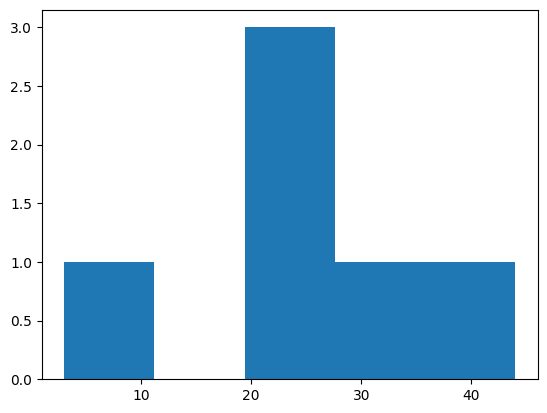

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [21, 22, 23, 3,44,34]
num_bins = 5
plt.hist(x, num_bins)
plt.show()



# 4. Compound interest

In [3]:
# Re-defining the parameters due to environment reset
initial_amount_daily = 1000  # initial deposit in PLN (assuming 1000 PLN as initial amount for demonstration)
annual_rate = 5.9  # annual interest rate in percentage
compounding_frequency = 365  # daily compounding
years = 1  # investment duration in years

# Calculating final amount with daily compounding
final_amount_daily = initial_amount_daily * (1 + annual_rate / (100 * compounding_frequency)) ** (compounding_frequency * years)
final_amount_daily


1060.770182997782

In [4]:
# Calculating the balance after one day with daily compounding at 10% annual interest rate
days_one = 1  # one day

# Calculating final amount after one day
amount_one_day = 1000 * (1 + (10 / (100 * 365))) ** days_one
amount_one_day


1000.2739726027396

# 5. Pdf analysis



In [ ]:
from PyPDF2 import PdfFileReader

# Paths to the PDF files
file_paths = ['/mnt/data/CV-09-24-1.pdf', '/mnt/data/CV-09-24.pdf']

# Function to get basic details about PDF quality, resolution isn't natively extractable but we can assess details per page
pdf_details = []
for file_path in file_paths:
    try:
        with open(file_path, 'rb') as file:
            pdf = PdfFileReader(file)
            num_pages = pdf.getNumPages()
            pdf_info = pdf.getDocumentInfo()
            pdf_details.append({
                'File Name': file_path.split('/')[-1],
                'Number of Pages': num_pages,
                'Author': pdf_info.author if pdf_info.author else 'Unknown',
                'Title': pdf_info.title if pdf_info.title else 'No Title',
                'Producer': pdf_info.producer if pdf_info.producer else 'Unknown',
            })
    except Exception as e:
        pdf_details.append({
            'File Name': file_path.split('/')[-1],
            'Error': str(e)
        })

import pandas as pd
pdf_details_df = pd.DataFrame(pdf_details)

# Display the dataframe with details
import ace_tools as tools; tools.display_dataframe_to_user(name="PDF File Details", dataframe=pdf_details_df)


In [ ]:
from pdf2image import convert_from_path

# Function to calculate image resolution (PPI)
def calculate_ppi(images, dpi):
    # Result to hold PPI details per image (page)
    ppi_details = []
    for i, img in enumerate(images):
        # Original image dimensions in pixels
        width, height = img.size
        # Calculate PPI based on dimensions and DPI setting
        ppi_x = width / (width / dpi)
        ppi_y = height / (height / dpi)
        ppi_details.append({
            'Page': i + 1,
            'Width (px)': width,
            'Height (px)': height,
            'Calculated PPI X': round(ppi_x),
            'Calculated PPI Y': round(ppi_y)
        })
    return ppi_details

# Define DPI for conversion (commonly used 300 for standard print quality)
dpi = 300
ppi_results = []

# Iterate through each PDF and analyze its images for PPI
for file_path in file_paths:
    try:
        # Convert PDF to images
        images = convert_from_path(file_path, dpi=dpi)
        # Calculate PPI for each page
        file_ppi_details = calculate_ppi(images, dpi)
        for detail in file_ppi_details:
            detail['File Name'] = file_path.split('/')[-1]
        ppi_results.extend(file_ppi_details)
    except Exception as e:
        ppi_results.append({
            'File Name': file_path.split('/')[-1],
            'Error': str(e)
        })

ppi_results_df = pd.DataFrame(ppi_results)

# Display the PPI details to the user
tools.display_dataframe_to_user(name="PDF PPI Details", dataframe=ppi_results_df)


In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import os

# Function to reduce image PPI and save as new PDF
def reduce_ppi_and_save(images, output_path, target_dpi=100):
    # Convert each image to the target DPI and save
    new_images = [img.resize((int(img.width * target_dpi / 300), int(img.height * target_dpi / 300)),
                             Image.LANCZOS) for img in images]
    new_images[0].save(output_path, save_all=True, append_images=new_images[1:])

# Paths to save reduced PPI PDFs
output_files = ['/mnt/data/CV-09-24-1_100ppi.pdf', '/mnt/data/CV-09-24_100ppi.pdf']

# Process each PDF file
for file_path, output_path in zip(file_paths, output_files):
    try:
        # Convert PDF to images at 300 DPI (to maintain original details for resizing)
        images = convert_from_path(file_path, dpi=300)
        # Reduce images to target DPI and save as new PDF
        reduce_ppi_and_save(images, output_path, target_dpi=100)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

output_files
